## Ensemble : Bagging

### 1. 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

### 2. 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


In [3]:
# id drop
drop_cols = ['id']
data.drop(drop_cols, axis=1, inplace=True)

In [4]:
# x, y 나누기
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [ ]:
# NA 조치

In [5]:
# 가변수화
cat_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)

In [6]:
# train, valid 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2022)

### 3. 모델링 (랜덤포레스트)

In [7]:
# 모델 선언
model = RandomForestClassifier(n_estimators=5, max_depth=3)

In [8]:
# 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [9]:
# 예측
pred = model.predict(x_val)

In [10]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       769
           1       0.71      0.61      0.66       731

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500



### 4. 시각화와 변수중요도

In [11]:
# 사용된 decision tree
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1414420002),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=788150431),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1379294806),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1860666480),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1236670128)]

In [13]:
# 개별 선택 가능
model.estimators_[4]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1236670128)

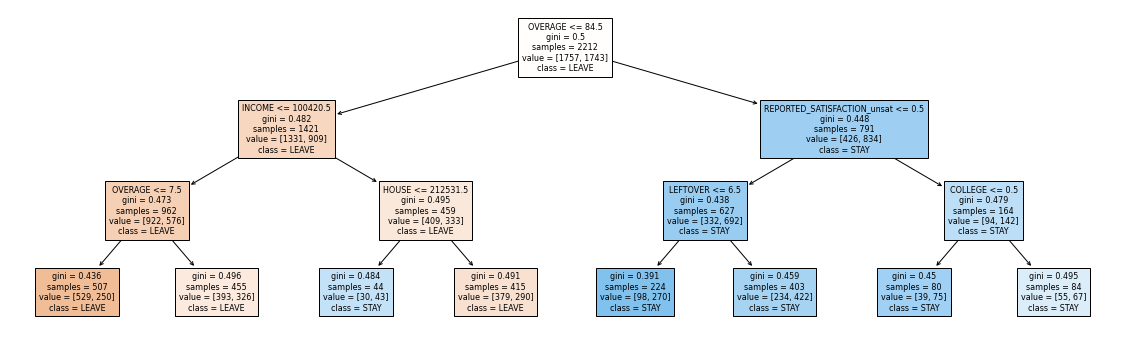

In [14]:
# 각 트리별로 시각화 가능
plt.figure(figsize=(20,6))
plot_tree(model.estimators_[4], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);

In [15]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.00496036 0.07154755 0.22408019 0.01088015 0.36969914 0.03502669
 0.2000041  0.07125497 0.         0.00315325 0.         0.00282985
 0.00132979 0.         0.00324509 0.         0.         0.
 0.         0.00198889]


In [16]:
# 변수 중요도 시각화 함수
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

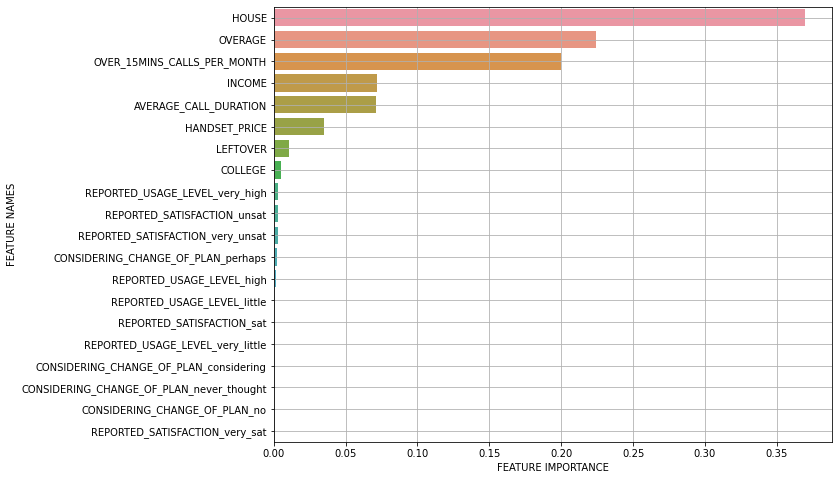

In [17]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)

### 5. 튜닝

- grid search 수행
    - 1. n_estimators (5 ~ 200까지 5개씩 증가)
    - 2. max_features (1 ~ feature의 갯수)
    - 3. n_estimators, max_features를 동시에 튜닝.

#### (1) n_estimators 튜닝

In [18]:
params = {
    'n_estimators': list(range(5, 201, 5))
}

In [19]:
model1 = RandomForestClassifier()
model1_gs = GridSearchCV(model1, params, cv=5)
model1_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, 150, ...]})

In [20]:
model1_gs.best_params_, model1_gs.best_score_

({'n_estimators': 180}, 0.6894285714285715)

In [21]:
pred1_gs = model1_gs.predict(x_val)
print(classification_report(y_val, pred1_gs))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       769
           1       0.71      0.71      0.71       731

    accuracy                           0.72      1500
   macro avg       0.72      0.72      0.72      1500
weighted avg       0.72      0.72      0.72      1500



In [22]:
# 튜닝 결과를 데이터 프레임으로 저장
result = pd.DataFrame(model1_gs.cv_results_)
temp = result.loc[:, ['param_n_estimators', 'mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,5,0.640857
1,10,0.660857
2,15,0.660286
3,20,0.676286
4,25,0.674571


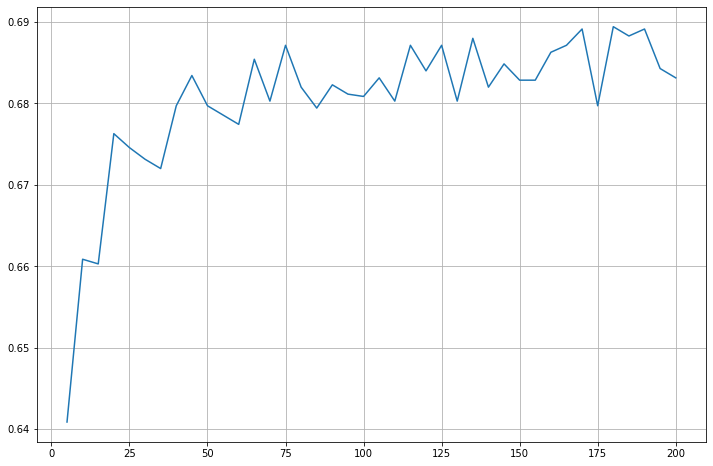

In [23]:
plt.figure(figsize = (12, 8))
plt.plot('param_n_estimators', 'mean_test_score', data = temp)
plt.grid()
plt.show()

- n_estimators의 경향
- 적당 지점을 elbow method로 찾음.


- 랜덤 포레스트의 트리 개수는 100 ~ 200개 사이에서 결정.
- 랜덤 포레스트의 트리 개수가 많아진다고 해서 모델이 복잡해지지 않는다.
    - 과적합을 피할수 있음. (트리들의 평균을 구하기 때문)

#### (2) max_features 튜닝

In [24]:
x_train.shape[1]

20

In [25]:
params = {
    'max_features': range(1, 21),
}

In [26]:
model2 = RandomForestClassifier()
model2_gs = GridSearchCV(model2, params, cv=5)
model2_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21)})

In [27]:
model2_gs.best_params_, model2_gs.best_score_

({'max_features': 9}, 0.6848571428571428)

In [28]:
pred2_gs = model2_gs.predict(x_val)
print(classification_report(y_val, pred2_gs))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       769
           1       0.71      0.72      0.71       731

    accuracy                           0.72      1500
   macro avg       0.72      0.72      0.72      1500
weighted avg       0.72      0.72      0.72      1500



In [29]:
result = pd.DataFrame(model2_gs.cv_results_)
temp = result.loc[:, ['param_max_features', 'mean_test_score']]
temp.head()

,param_max_features,mean_test_score
0,1,0.667429
1,2,0.672857
2,3,0.683714
3,4,0.683429
4,5,0.683143


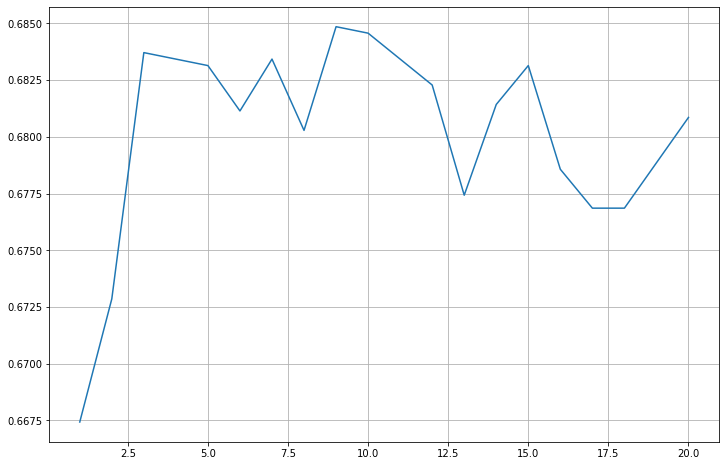

In [30]:
plt.figure(figsize = (12, 8))
plt.plot('param_max_features', 'mean_test_score', data = temp)
plt.grid()
plt.show()

- features를 10에서 정점을 찍고 하락하는 경향
- 다른 경우도 대체로 비슷 (전체 features에 root를 한 값)
    - RandomForest의 max_festures의 result

#### (3) n_estimators와 max_features 동시에 튜닝

In [31]:
params = {
    'n_estimators': range(5, 20, 5),
    'max_features': range(1, 21),
}

In [32]:
model3 = RandomForestClassifier()
model3_gs = GridSearchCV(model3, params, cv=5)
model3_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21),
                         'n_estimators': range(5, 20, 5)})

In [33]:
model3_gs.best_params_, model3_gs.best_score_

({'max_features': 20, 'n_estimators': 15}, 0.678)

In [34]:
pred3_gs = model3_gs.predict(x_val)
print(classification_report(y_val, pred3_gs))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       769
           1       0.65      0.66      0.65       731

    accuracy                           0.66      1500
   macro avg       0.66      0.66      0.66      1500
weighted avg       0.66      0.66      0.66      1500



In [35]:
result = pd.DataFrame(model3_gs.cv_results_)
temp = result.loc[:, ['param_n_estimators', 'param_max_features', 'mean_test_score']]
temp.head()

,param_n_estimators,param_max_features,mean_test_score
0,5,1,0.582000
1,10,1,0.610286
2,15,1,0.640286
3,5,2,0.616857
4,10,2,0.630857


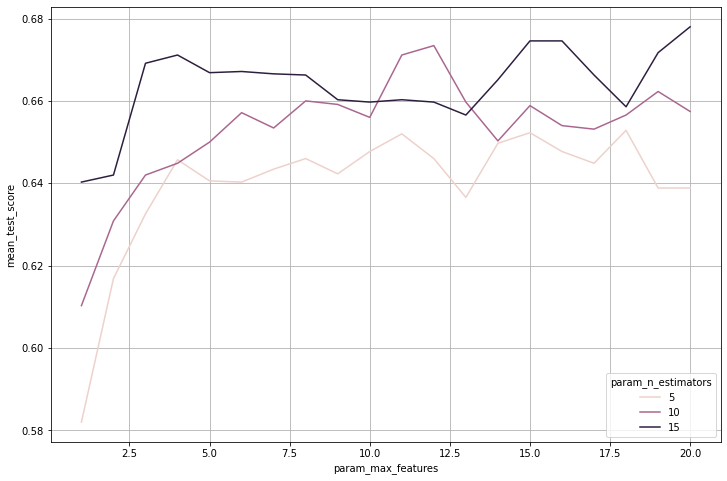

In [36]:
plt.figure(figsize = (12, 8))
sns.lineplot('param_max_features', 'mean_test_score', data = temp,
             hue = 'param_n_estimators')
plt.grid()
plt.show()